# Data CLeaning

In [26]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
df.shape

(246091, 7)

In [5]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
df['Production'].min()

0.0

In [7]:

df.fillna(0,inplace=True)
df.head(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0


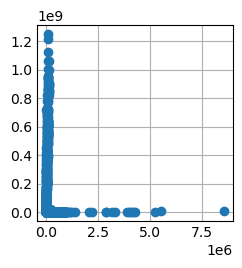

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('_mpl-gallery')
plt.scatter(df['Area'],df['Production'])
plt.show()

## Outlier detection methods

List of the outlier detection methods I mentioned earlier, along with a brief description of each method:

1. **Z-Score Method**:
   - Calculate the Z-score for each data point.
   - Identify outliers based on a specified threshold (e.g., Z-score > threshold).
   - Useful for identifying data points that are far from the mean.

2. **Interquartile Range (IQR) Method**:
   - Calculate the IQR (interquartile range) of the data.
   - Identify outliers based on a specified threshold (e.g., values outside of Q1 - threshold * IQR or Q3 + threshold * IQR).
   - Particularly useful for data with non-normal distributions.

3. **Isolation Forest**:
   - An ensemble method that isolates outliers by randomly selecting features and recursively splitting data.
   - Outliers are data points that require fewer splits to be isolated.
   - Well-suited for high-dimensional data and does not assume any specific distribution.

4. **Local Outlier Factor (LOF)**:
   - Measures the local density deviation of a data point compared to its neighbors.
   - Outliers have a significantly lower density than their neighbors.
   - Good for detecting outliers in clusters or regions of varying densities.

5. **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise):
   - Clusters dense regions of data points and identifies outliers as noise points.
   - Useful for identifying outliers in data with varying density and irregular shapes.

6. **One-Class SVM** (Support Vector Machine):
   - A binary classification algorithm that identifies outliers as data points far from the decision boundary.
   - Useful for situations where you have only one class of data (e.g., only normal instances).

7. **Elliptic Envelope**:
   - Fits an ellipse to the inliers of the data.
   - Identifies outliers based on the Mahalanobis distance from the ellipse.
   - Assumes the data follows a Gaussian distribution.

8. **Histogram-Based Outlier Detection** (HBOS from PyOD library):
   - Estimates the likelihood of each data point being an outlier based on histograms.
   - Assumes that outliers have a lower probability distribution in the feature space.

These methods each have their own strengths and assumptions. The choice of method depends on the nature of your data, the presence of clusters or varying densities, and the specific requirements of your application. Experimenting with different methods and understanding their underlying principles will help you choose the most appropriate technique for detecting outliers or anomalies in your data.


**Note:** A threshold in the context of outlier detection or data analysis is a value that defines a boundary or limit beyond which data points are considered as outliers or anomalies. It helps you make a decision about whether a data point should be classified as an outlier based on its distance or deviation from the "normal" or expected behavior of the data.

For example, in the Z-score method and the IQR method, a threshold is set to determine how extreme a data point's value needs to be before it's classified as an outlier. In the case of Z-score, data points with a Z-score above a certain threshold (e.g., 2 or 3) are considered outliers. Similarly, in the IQR method, data points that fall below Q1 - threshold * IQR or above Q3 + threshold * IQR are considered outliers.

The choice of threshold can significantly impact the number of points identified as outliers. A lower threshold may result in more data points being classified as outliers, while a higher threshold may lead to fewer outliers being detected. Selecting an appropriate threshold depends on the nature of your data, the characteristics of the distribution, and your domain knowledge or specific objectives for outlier detection.

Imagine you have a set of data points, and you want to find the ones that are very different from the rest. A threshold is like a limit or a rule that you set to determine what counts as "very different."

For example, let's say you're measuring the heights of people in a group. Most heights might be around 170 cm, but there might be a few exceptionally tall or short people. You could set a threshold of 10 cm. If a height is more than 10 cm away from the average (170 cm), you might consider it an outlier.

In this case, the threshold of 10 cm helps you decide when a height is unusual enough to be considered an outlier. The threshold defines how extreme a value needs to be before it's marked as an anomaly or outlier. You can adjust the threshold to be more or less strict based on your specific needs and the characteristics of your data.

## 1. Z-Score Method (using scipy.stats.zscore):
This method calculates the Z-score for each data point and identifies outliers based on a specified threshold.

### Find/Define threshold

In [9]:
# z_scores = np.abs(stats.zscore(area))     x-u/std

z_threshold_area = 25
z_threshold_production = 45

z_score_area = np.abs(stats.zscore(df['Area']))
outliers_area = np.where(z_score_area > z_threshold_area)[0]
print(outliers_area)
print(outliers_area.shape)

print('\n')

z_score_Production = np.abs(stats.zscore(df['Production']))
outliers_production = np.where(z_score_Production > z_threshold_production)[0]
print(outliers_production)
print(outliers_production.shape)

[236486 237381 238007 238610 239174 240719 241314 242744 242757 243301
 243654 244290 244305 244878 244891]
(15,)


[  2543 100135 100149 100162 100178 100197 100223 100245 100258 100271
 100284 100297 100310 100323 100336 100350 100373 100391 100483 100513
 100537 100552 100568 100583 100598 100612 100625 100639 100654 100679
 100698 178273 178331 185975]
(34,)


In [10]:
 def add_z_column():
    df["z_score_Area"] = np.abs(stats.zscore(df['Area']))
    df['z_score_Production'] = np.abs(stats.zscore(df['Production']))
    print(df.head(3))

In [11]:
add_z_column()
print("Initial shape {}".format(df.shape))
df = df[df['z_score_Area'] <= z_threshold_area]                                #select non outliners
df = df[df['z_score_Production'] <= z_threshold_production]                    #select non outliners
df.drop(['z_score_Area', 'z_score_Production'],axis = 1, inplace = True)
print(df)

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        

                  Crop    Area  Production  z_score_Area  z_score_Production  
0             Arecanut  1254.0      2000.0      0.212750            0.033755  
1  Other Kharif pulses     2.0         1.0      0.237530            0.033873  
2                 Rice   102.0       321.0      0.235551            0.033854  
Initial shape (246091, 9)
                         State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000 

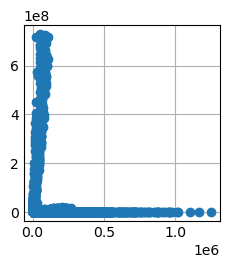

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('_mpl-gallery')
plt.scatter(df['Area'],df['Production'])
plt.show()

## 2. Interquartile Range (IQR) Method:
This method involves calculating the IQR of the data and identifying outliers based on a specified threshold.

### Find/Define threshold

In [58]:
df = pd.read_csv('data.csv')
initial_shape = df.shape
print(df.shape)
print(df.head(3))

(246091, 7)
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  


In [59]:
def find_outliers_iqr(data, threshold):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - (threshold * iqr)
    upper_bound = q75 + (threshold * iqr)
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outliers

area = df['Area']
production = df['Production']
a_threshold = 25
p_threshold = 45 # No outliers


a_outliers = find_outliers_iqr(area, a_threshold)
p_outliers = find_outliers_iqr(production, p_threshold)


print(a_outliers,a_outliers.shape)
print(p_outliers,p_outliers.shape)

[   208    236    261 ... 246017 246052 246089] (6636,)
[] (0,)


In [27]:
def find_iqr(data, threshold):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - (threshold * iqr)
    upper_bound = q75 + (threshold * iqr)
    outliers = ((data > lower_bound) & (data < upper_bound)) #select non outliners
    return outliers
    
def add_Q_column():
    df["Q_Area"] = find_iqr(area, a_threshold)
    df['Q_Production'] = find_iqr(production, p_threshold)
    print(df.head(3))

In [28]:
find_iqr(production, p_threshold).unique()

array([False])

In [28]:
x = np.arange(0,12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [32]:
(x>6) | (x<2)

array([ True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True])

### Mean-based anomaly detection

In [70]:
# Read the CSV file into a DataFrame
df = pd.read_csv('data.csv')
initial_shape = df.shape

In [71]:
# Calculate mean and standard deviation for area and production
area_mean, area_std = df['Area'].mean(), df['Area'].std()
production_mean, production_std = df['Production'].mean(), df['Production'].std()

# Define threshold ranges for area and production
area_lower, area_upper = area_mean - area_std, area_mean + area_std
production_lower, production_upper = production_mean - production_std, production_mean + production_std

# Identify outliers and non-outliers for area and production
area_outliers_bool = (df['Area'] < area_lower) | (df['Area'] > area_upper)
production_outliers_bool = (df['Production'] < production_lower) | (df['Production'] > production_upper)
area_non_outliers_bool = ~area_outliers_bool
production_non_outliers_bool = ~production_outliers_bool

# Filter the DataFrame based on outliers and non-outliers
area_outliers = df[area_outliers_bool]
production_outliers = df[production_outliers_bool]
df = df[area_non_outliers_bool & production_non_outliers_bool]

# Print information about outliers and non-outliers
print(f'Number of Area outliers: {area_outliers_bool.sum()}')
print(f'Number of Production outliers: {production_outliers_bool.sum()}')

print(f'\nArea outliers:\n{area_outliers}\n\nProduction outliers:\n{production_outliers}')

print(f'\nNumber of Area Non outliers: {area_non_outliers_bool.sum()}')
print(f'Number of Production Non outliers: {production_non_outliers_bool.sum()}')

print(f'\nFinal DataFrame:\n{df}')
print(f'Initial shape{initial_shape}\nFinal DataFrame shape: {df.shape}')


Number of Area outliers: 13303
Number of Production outliers: 447

Area outliers:
            State_Name District_Name  Crop_Year       Season       Crop  \
208     Andhra Pradesh     ANANTAPUR       1997  Kharif       Groundnut   
236     Andhra Pradesh     ANANTAPUR       1998  Kharif       Groundnut   
261     Andhra Pradesh     ANANTAPUR       1999  Kharif       Groundnut   
294     Andhra Pradesh     ANANTAPUR       2000  Kharif       Groundnut   
342     Andhra Pradesh     ANANTAPUR       2001  Kharif       Groundnut   
...                ...           ...        ...          ...        ...   
245954     West Bengal       PURULIA       2010  Winter            Rice   
245985     West Bengal       PURULIA       2011  Winter            Rice   
246017     West Bengal       PURULIA       2012  Winter            Rice   
246052     West Bengal       PURULIA       2013  Winter            Rice   
246089     West Bengal       PURULIA       2014  Winter            Rice   

            Area 

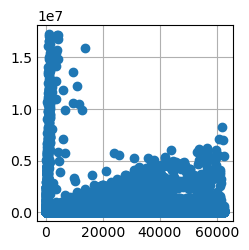

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('_mpl-gallery')
plt.scatter(df['Area'],df['Production'])
plt.show()

## Replace values

### Mean Replacement

In [6]:
df.head(1)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0


In [13]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [121]:
mean = df['Production'].mean()
median = df['Production'].median()
mode = df['Production'].mode()
print(mean,median,mode)

582503.4422509808 729.0 0    1.0
Name: Production, dtype: float64


In [111]:
#df[df['Production'].isnull()]=df[df['Production'].dropna()].mean


mean = df['Production'].mean()

df_temp = df.copy(deep=True)

df_temp['Production'].fillna(df_temp['Production'].mean(),inplace=True)
df_temp.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [112]:
yt = []
for i in df_temp['Production']:
    typ = type(i)
    yt.append(typ)
set(yt)

{float}

In [124]:
print(df_temp[df_temp['Production']==mean].shape)
df_temp[df_temp['Production']==mean].head(1)

(3730, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,582503.442251


### Median based on Z score replacement

In [127]:
df.head(1)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0


In [128]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [130]:
mean = df['Production'].mean()
median = df['Production'].median()
mode = df['Production'].mode()
std = df['Production'].std()
print(mean,median,mode,std)

582503.4422509808 729.0 0    1.0
Name: Production, dtype: float64 17065813.172410313


In [131]:
def z(x,mean,std):
    z = abs(x-mean)/std
    return z

In [136]:
x = z(df['Production'],mean=mean,std=std)
print((x>1.5).sum())
df[x>1.5]

406


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0
...,...,...,...,...,...,...,...
241972,West Bengal,HOWRAH,2007,Whole Year,Coconut,2895.00,30687000.0
243491,West Bengal,MEDINIPUR EAST,2006,Whole Year,Coconut,3662.00,40824000.0
243517,West Bengal,MEDINIPUR EAST,2007,Whole Year,Coconut,3692.00,46905000.0
244598,West Bengal,MURSHIDABAD,2006,Whole Year,Coconut,4202.00,59361700.0


In [138]:
df['Production'][x>1.5] =median

/tmp/ipykernel_3487/3360450897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production'][x>1.5] =median


In [139]:
df['Production'][x>1.5]

5         729.0
14        729.0
23        729.0
32        729.0
41        729.0
          ...  
241972    729.0
243491    729.0
243517    729.0
244598    729.0
244637    729.0
Name: Production, Length: 406, dtype: float64

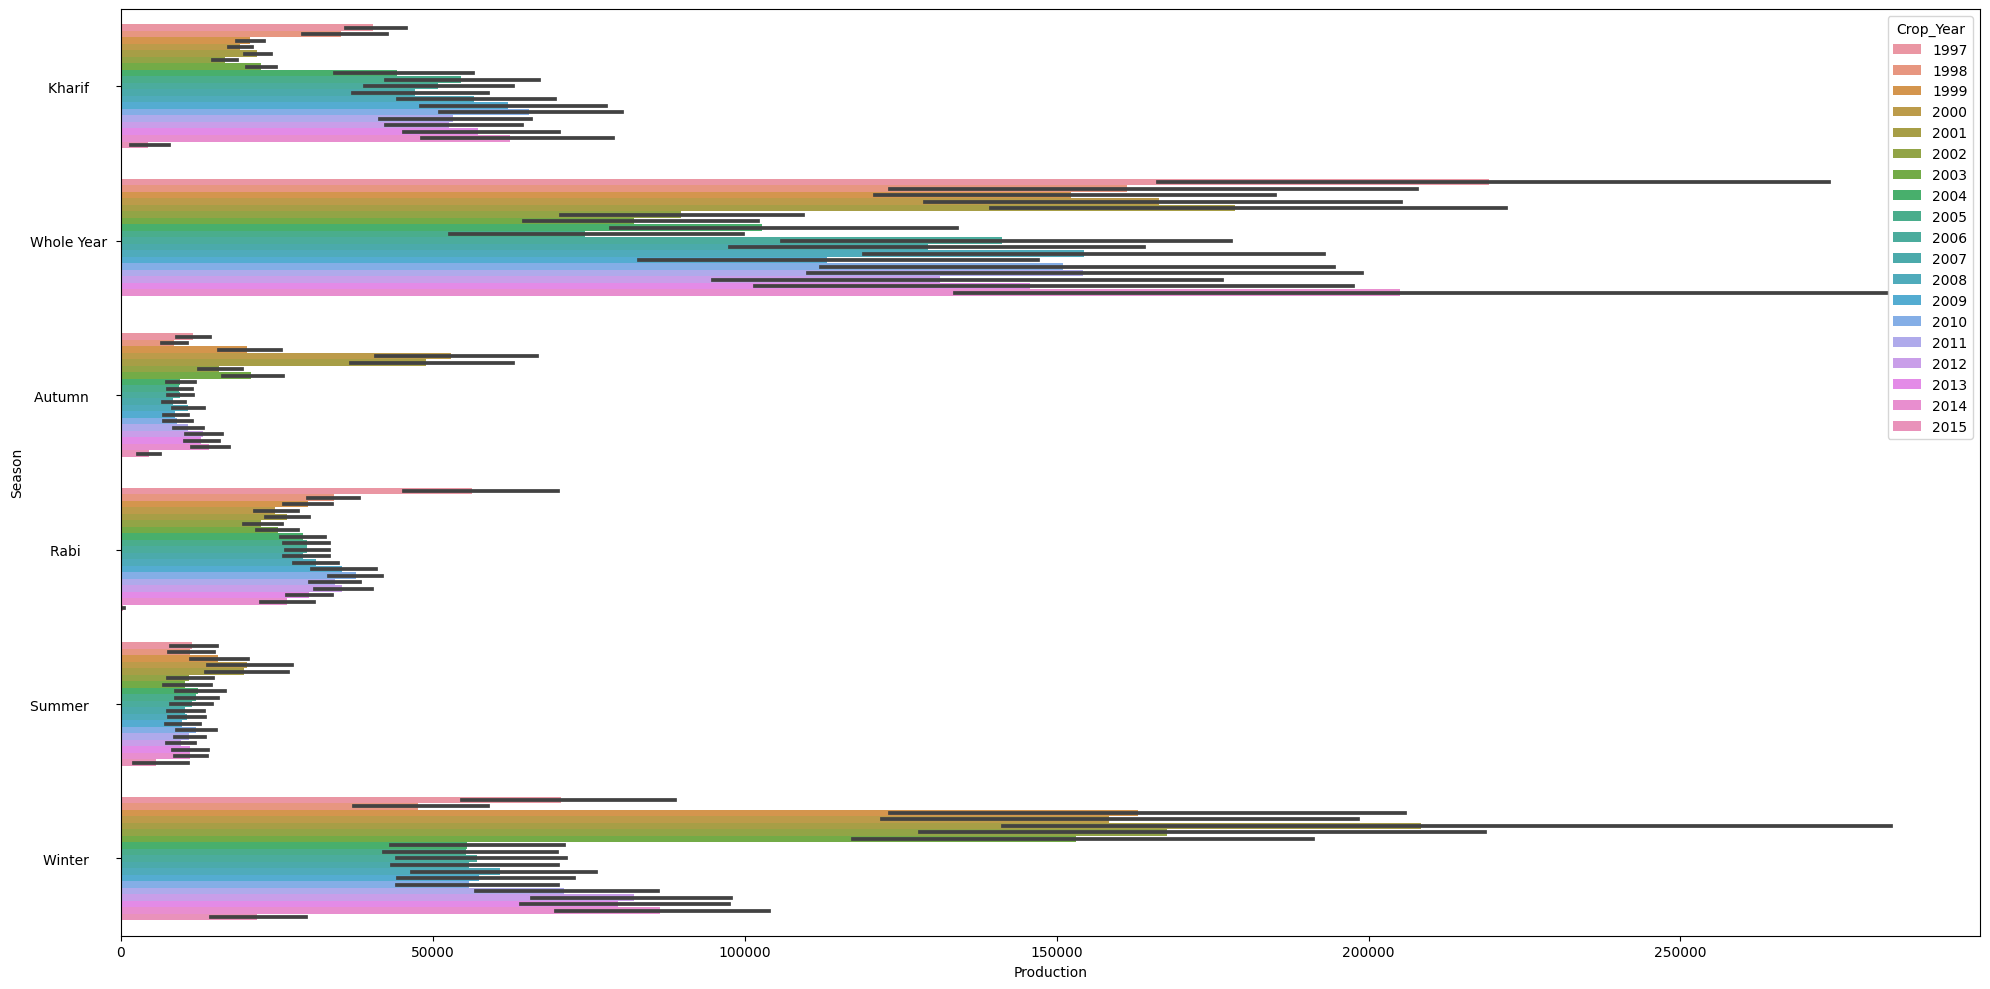

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(x=df['Production'],y=df['Season'],orient='h',hue=df['Crop_Year'])
plt.tight_layout()
plt.show()

In [145]:
df['Production']

0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 246091, dtype: float64

# END

In [74]:
import pandas as pd
import numpy as np

def find_outliers_iqr(data, threshold):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - (threshold * iqr)
    upper_bound = q75 + (threshold * iqr)
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outliers

def find_iqr(data, threshold):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - (threshold * iqr)
    upper_bound = q75 + (threshold * iqr)
    non_outliers = ((data > lower_bound) & (data < upper_bound))
    return non_outliers

def main():
    df = pd.read_csv('data.csv')
    initial_shape = df.shape
    print(df.shape)
    
    area = df['Area']
    production = df['Production']
    a_threshold = 25
    p_threshold = 45
    
    a_outliers = find_outliers_iqr(area, a_threshold)
    p_outliers = find_outliers_iqr(production, p_threshold)
    
    print(a_outliers, a_outliers.shape)
    print(p_outliers, p_outliers.shape)
    
    df['Q_Area'] = find_iqr(area, a_threshold)
    df['Q_Production'] = find_iqr(production, p_threshold)
    print(df.head(3))
    print(f'Number of Area Non outliers: {df["Q_Area"].sum()}')
    print(f'Number of Production Non outliers: {df["Q_Production"].sum()}')
    df_non_outliers = df[df['Q_Area'] & df['Q_Production']]
    print(f'Final DataFrame:\n{df_non_outliers}')
    print(f'Final DataFrame shape: {df_non_outliers.shape}')

if __name__ == "__main__":
    main()
df


(246091, 7)
[   208    236    261 ... 246017 246052 246089] (6636,)
[] (0,)
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        

                  Crop    Area  Production  Q_Area  Q_Production  
0             Arecanut  1254.0      2000.0    True         False  
1  Other Kharif pulses     2.0         1.0    True         False  
2                 Rice   102.0       321.0    True         False  
Number of Area Non outliers: 239455
Number of Production Non outliers: 0
Final DataFrame:
Empty DataFrame
Columns: [State_Name, District_Name, Crop_Year, Season, Crop, Area, Production, Q_Area, Q_Production]
Index: []
Final DataFrame shape: (0, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0


In [76]:
import pandas as pd
import numpy as np
from scipy import stats

# Function to find outliers using z-scores
def find_outliers_zscore(data, threshold):
    z_scores = np.abs(stats.zscore(data))
    outliers = np.where(z_scores > threshold)[0]
    return outliers

# Function to add z-score columns to the DataFrame
def add_z_column(data_frame, column_name, threshold):
    z_scores = np.abs(stats.zscore(data_frame[column_name]))
    data_frame[f'z_score_{column_name}'] = z_scores
    print(data_frame.head(3))

# Main function
def main():
    # Read the CSV file into a DataFrame
    df = pd.read_csv('data.csv')
    initial_shape = df.shape
    print(f'Initial DataFrame shape: {initial_shape}')

    # Set thresholds for identifying outliers
    z_threshold_area = 25
    z_threshold_production = 45

    # Find and print outliers for 'Area'
    outliers_area = find_outliers_zscore(df['Area'], z_threshold_area)
    print(f'Outliers in Area: {outliers_area}')
    print(f'Number of Area outliers: {len(outliers_area)}')

    print('\n')

    # Find and print outliers for 'Production'
    outliers_production = find_outliers_zscore(df['Production'], z_threshold_production)
    print(f'Outliers in Production: {outliers_production}')
    print(f'Number of Production outliers: {len(outliers_production)}')

    # Add z-score columns to the DataFrame
    add_z_column(df, 'Area', z_threshold_area)
    add_z_column(df, 'Production', z_threshold_production)

    print(f"DataFrame after adding z-score columns:\n{df.head(3)}")

    # Filter the DataFrame to include only non-outliers
    df = df[(df['z_score_Area'] <= z_threshold_area) & (df['z_score_Production'] <= z_threshold_production)]

    # Drop the z-score columns
    df.drop(['z_score_Area', 'z_score_Production'], axis=1, inplace=True)

    print(f"\nFinal DataFrame after filtering:\n{df}")
    print(f'Final DataFrame shape: {df.shape}')

# Run the main function if the script is executed directly
if __name__ == "__main__":
    main()
df

Initial DataFrame shape: (246091, 7)
Outliers in Area: [236486 237381 238007 238610 239174 240719 241314 242744 242757 243301
 243654 244290 244305 244878 244891]
Number of Area outliers: 15


Outliers in Production: []
Number of Production outliers: 0
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        

                  Crop    Area  Production  z_score_Area  
0             Arecanut  1254.0      2000.0      0.212750  
1  Other Kharif pulses     2.0         1.0      0.237530  
2                 Rice   102.0       321.0      0.235551  
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  And

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
